In [11]:
%matplotlib inline

In [22]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from hamiltonian import initialize_ising_1d

import jax.numpy as np

from time import time
from pathlib import Path
import warnings
import matplotlib.pyplot as plt
from IPython.display import display, clear_output


Complex_warning = True
pbc = False
lr = 1e-02
print_every =  10
batch_size = 100
num_spins = 10
epochs = 500
seed = 0
width = 24
filter_size = 3

if Complex_warning:
    warnings.filterwarnings(
            "ignore",
            message="Casting complex values to real discards the imaginary part",
        )

step, opt_state, key = initialize_ising_1d(
        width,
        filter_size,
        seed,
        num_spins,
        lr,
        batch_size,
        pbc,
    )
        
if pbc is False:
    gs_energy = 1 - 1 / (np.sin(np.pi / (2 * (2 * num_spins + 1))))
else:
    gs_energy = np.nan

In [23]:
E = []
E_imag = []
mag = []
E_var = []
epoch = []
Time = []

start = time()
old_time = time()

print("Step\tEnergy\tMagnetization\tVariance\ttime/step")
print("---------------------------------------------------------")

for i in range(epochs):
    opt_state, key, energy, e_imag, magnetization, var = step(i, opt_state, key)
    E.append(energy)
    E_imag.append(e_imag)
    mag.append(magnetization)
    E_var.append(var.real)
    epoch.append(i)
    now = time()
    Time.append(now - start)
    if i % print_every == 0 and i > 0:
        new_time = time()
        print(
            "{}\t{:.2f}\t{:.2f}\t{:.3f}\t{:.2f}".format(
                i, energy, magnetization, var.real, new_time - old_time
            )
        )
        old_time = new_time

Step	Energy	Magnetization	Variance	time/step
---------------------------------------------------------
10	-9.13	9.54	8.657	114.63
20	-9.28	9.86	0.434	1.79
30	-9.46	9.78	0.259	1.67
40	-9.39	9.88	0.078	1.65
50	-9.67	9.76	1.281	1.68
60	-10.57	9.00	4.769	1.93
70	-10.52	9.26	3.072	1.66
80	-10.91	9.46	2.508	1.66
90	-11.07	9.00	1.699	1.96
100	-11.33	8.98	1.642	1.84
110	-11.32	8.90	2.283	1.69
120	-11.39	8.84	3.171	1.64
130	-11.42	9.12	1.197	1.65
140	-11.43	8.74	1.715	1.65
150	-11.42	8.48	1.685	1.68
160	-11.51	7.66	2.100	1.68
170	-11.64	7.80	1.969	1.63
180	-11.86	7.90	1.141	1.69
190	-11.71	8.20	1.217	1.83
200	-11.73	8.14	0.855	1.92
210	-11.73	8.64	1.558	1.86
220	-12.02	6.54	0.913	1.70
230	-12.07	5.26	0.432	1.67
240	-12.34	2.92	0.492	1.66
250	-12.26	3.34	0.387	1.69
260	-12.29	1.14	0.337	1.66
270	-12.26	3.54	0.226	1.65
280	-12.37	0.46	0.264	2.23
290	-12.21	0.68	0.181	2.25
300	-12.36	0.88	0.130	2.04
310	-12.35	0.92	0.112	2.44
320	-12.34	0.82	0.232	1.69
330	-12.36	0.74	0.091	1.71
340	-12.35	-0.26	0

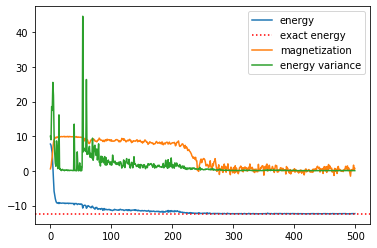

In [24]:
plt.plot(E, label='energy')
plt.axhline(gs_energy, label='exact energy',linestyle=':', color="r")
plt.plot(mag, label='magnetization')
plt.plot(E_var, label='energy variance')
plt.legend()
plt.show()